# 911 EDA and Visualization

**For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).
This file contains calls to 911 (emergency calls) in Montgomery County Pennsylvania.**

A data exploration and visualization project analyzing 911 emergency call data. This project examines the volume and reasons for calls across various hours of the day and days of the week. It uses pandas, matplotlib, and seaborn to uncover patterns in emergency service requests through time-based heatmaps, call type distributions, and geographical trends.

**The data contains the following fields:**

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


____
**Importing Numpy, Pandas:**

In [121]:
import numpy as np
import pandas as pd

**Importing visualization libraries (Seaborn & Matplotlib) and set %matplotlib inline:**

In [123]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.dpi'] = 150  #setting dpi to 150

**Read in the csv file as a dataframe called df:**

In [125]:
df = pd.read_csv('911.csv')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [127]:
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


**The top 5 zipcodes for 911 calls:**

In [129]:
df.zip.head(5)

0    19525.0
1    19446.0
2    19401.0
3    19401.0
4        NaN
Name: zip, dtype: float64

**Top 5 townships (twp) for 911 calls:**

In [131]:
df.twp.head(5)

0          NEW HANOVER
1    HATFIELD TOWNSHIP
2           NORRISTOWN
3           NORRISTOWN
4     LOWER POTTSGROVE
Name: twp, dtype: object

**Total Number of unique title codes:"**

In [133]:
len(df.title.unique())

110

**Creating the Reason Feature by extracting it from title feature:**

In [135]:
df['Reason']  = df.title.apply(lambda string : string.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**Most common Reason for a 911 call:**

In [137]:
df['Reason'].value_counts().head(1)

Reason
EMS    48877
Name: count, dtype: int64

**Creating a countplot of 911 calls by Reason:**

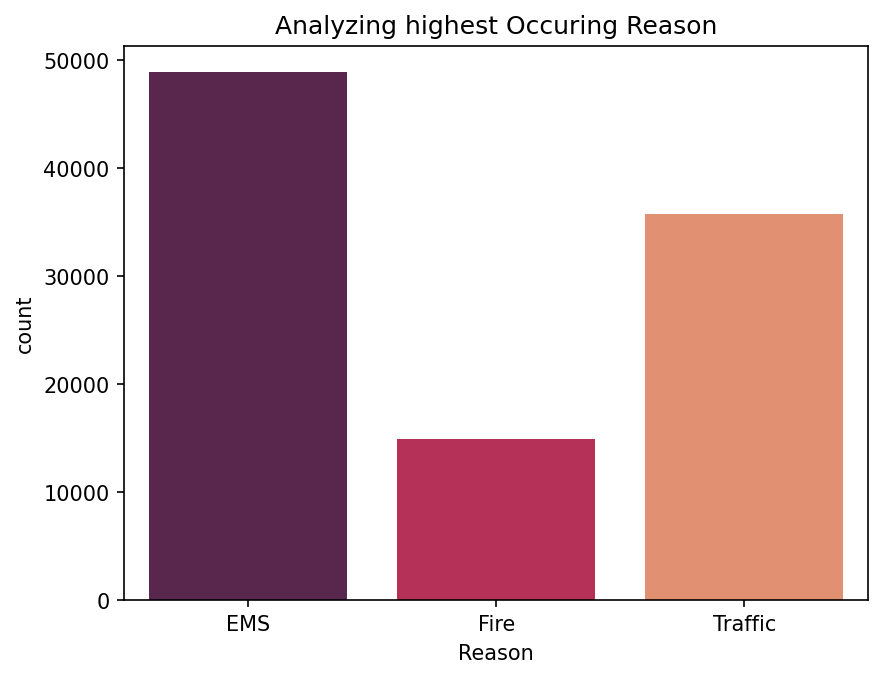

In [139]:
#NOTE: Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0, Thus assigning the `x` variable to `hue`
sns.countplot(x = df['Reason'], hue = df['Reason'], palette = 'rocket')

plt.title('Analyzing highest Occuring Reason')

plt.show()

___
**Type of the objects in the timeStamp column:**

In [141]:
type(df['timeStamp'].iloc[0])

str

**Here timestamps are still strings. Though using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects:**

In [143]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**Extracting Hour, Month & Day of Week from respective timestamp, then mapping the Day of Week with respective day name:**

In [145]:

df['Hour'] = df['timeStamp'].apply(lambda time : time.hour)
df['Month'] = df['timeStamp'].apply(lambda time : time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


**Mapping Day Name:**

In [147]:
dmap = {0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu', 4 : 'Fri', 5 : 'Sat', 6 : 'Sun'} #declaring respective day names as per integer.
df['Day of Week'] = df['Day of Week'].map(dmap) #mapping

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


**Count of Reasons - Day Wise:**

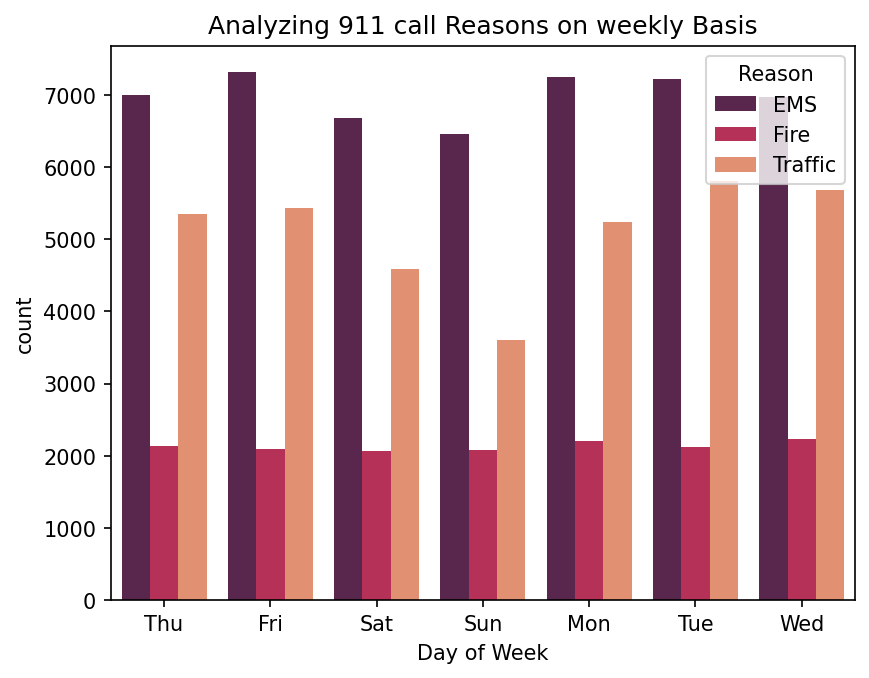

In [149]:
sns.countplot(x = df['Day of Week'],hue = df['Reason'], palette = 'rocket')
plt.title('Analyzing 911 call Reasons on weekly Basis')

plt.show()

**Now doing same for Month:**

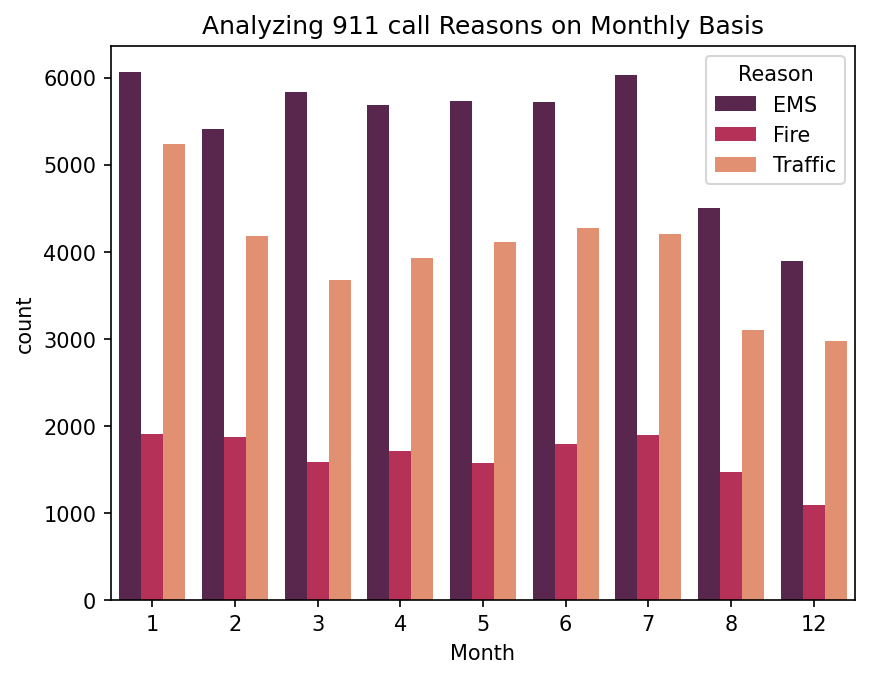

In [151]:
sns.countplot(x = df['Month'], hue = df['Reason'], palette = 'rocket')
plt.title('Analyzing 911 call Reasons on Monthly Basis')

plt.show()

**Grouping by Month & using count():**

In [153]:
#grouping by month
byMonth = df.groupby('Month')

#dataframe having count on month basis
counter = byMonth.count()

counter.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Creating a simple plot of the dataframe indicating the count of calls per month:**

In [155]:
#Using "counter['title']" ----> which is basically giving us count of calls per month.
count_of_title_monthly = counter['title']

count_of_title_monthly.head(12)

Month
1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
Name: title, dtype: int64

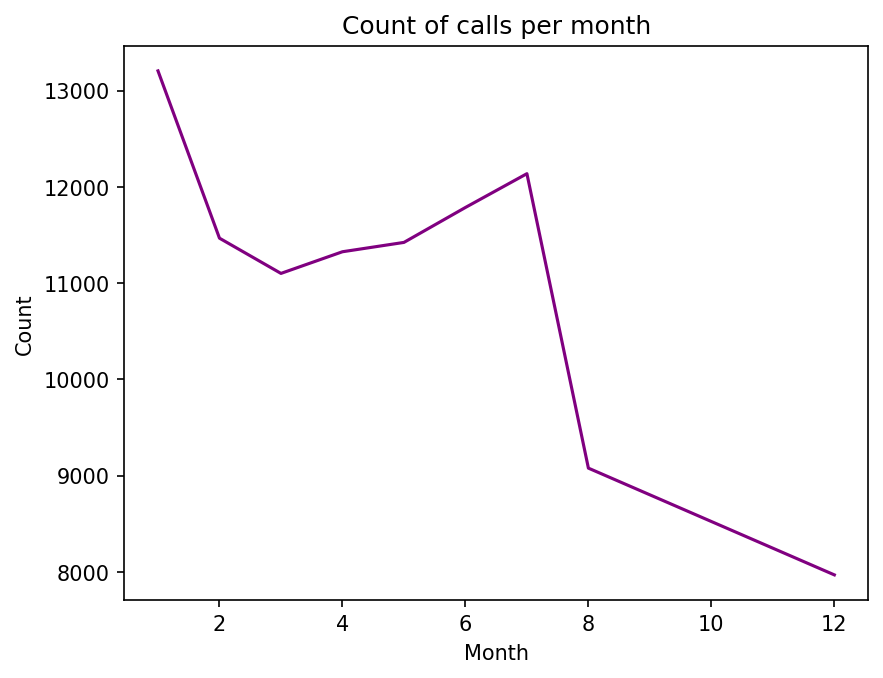

In [156]:
count_of_title_monthly.plot(color = 'purple')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of calls per month')
plt.show()

**Resetting the index of counter dataframe from month, in order that in further operations seaborn library can read month Feature:**

In [158]:
#in counter dataframe, our month is index, thus we need to reset it's index:
counter.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [159]:
#index reset
counter.reset_index(inplace = True)
counter.head()

#now seaborn will be able to read month feature

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Generating Linear Model Plot using seaborn to create a linear fit on the number of calls per month:**

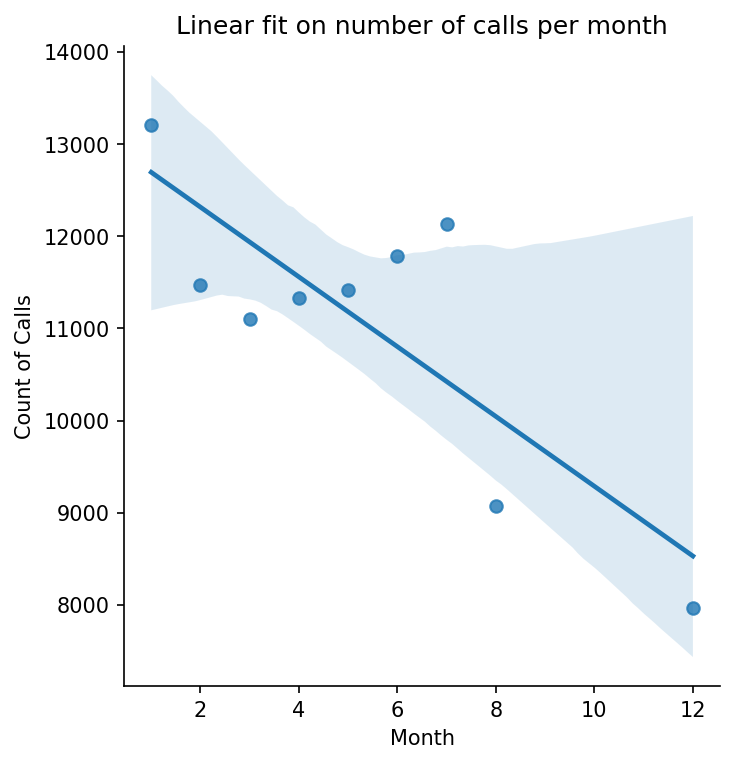

In [161]:
sns.lmplot(x = 'Month', y = 'title', data = counter)

plt.xlabel('Month')
plt.ylabel('Count of Calls')
plt.title('Linear fit on number of calls per month')

plt.show()

**Creating a New Date feature by extracting it from timeStamp feature:**

In [163]:
df['Date'] = df['timeStamp'].apply(lambda timestp : timestp.date())

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [165]:
#Grouping the df dataframe by date feature.
date_by_group = df.groupby('Date')  

#Generating a count containing dataframe by utilizing dataframe which is grouped on basis of date.
counter = date_by_group.count() 

#Resetting index to make seaborn able to access Date feature in dataframe.
counter.reset_index(inplace = True) 
counter.head(100)  #In total we have 259 rows

,Date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
1,2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2,2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
3,2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
4,2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016-03-14,384,384,384,338,384,384,383,379,384,384,384,384,384
96,2016-03-15,382,382,382,329,382,382,382,378,382,382,382,382,382
97,2016-03-16,359,359,359,320,359,359,359,358,359,359,359,359,359
98,2016-03-17,412,412,412,364,412,412,412,408,412,412,412,412,412


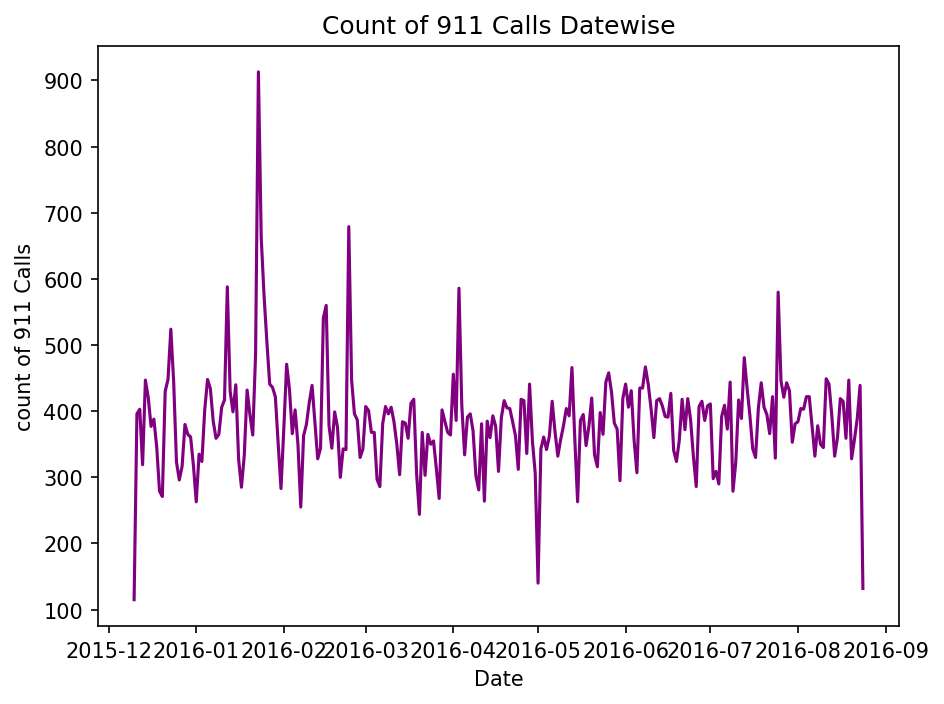

In [166]:
#Will be using "counter['Month']" on Y axis which denotes count of call date wise...
sns.lineplot(x = counter['Date'], y = counter['Month'], color = 'purple')

plt.xlabel('Date')
plt.ylabel('count of 911 Calls')
plt.title('Count of 911 Calls Datewise')
plt.tight_layout()

plt.show()

**Creating plot representing count of Calls - Date wise, where reason for call is EMS:**

In [168]:
#REASON: EMS -----> Date vs Call count: 

#Generating a dateframe which only contain data where reason for call is 'EMS':
ems_reason = df[df['Reason'] == 'EMS']

#grouping above dataframe by Date & naming it as group_by_date:
group_by_date = ems_reason.groupby('Date')

#Generating dataframe containing count & naming it as Counter:
counter = group_by_date.count() 

counter.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189
2015-12-13,190,190,190,178,190,190,190,190,190,190,190,190,190
2015-12-14,222,222,222,201,222,222,222,222,222,222,222,222,222
2015-12-15,195,195,195,180,195,195,194,195,195,195,195,195,195
2015-12-16,192,192,192,185,192,192,192,192,192,192,192,192,192
2015-12-17,166,166,166,151,166,166,166,166,166,166,166,166,166
2015-12-18,164,164,164,151,164,164,164,164,164,164,164,164,164


In [169]:
#Resetting index of counter dataframe, so that seaborn can read the Date feature in the counter dataframe.
counter.reset_index(inplace = True)
counter.head()

,Date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57
1,2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2,2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189
3,2015-12-13,190,190,190,178,190,190,190,190,190,190,190,190,190
4,2015-12-14,222,222,222,201,222,222,222,222,222,222,222,222,222


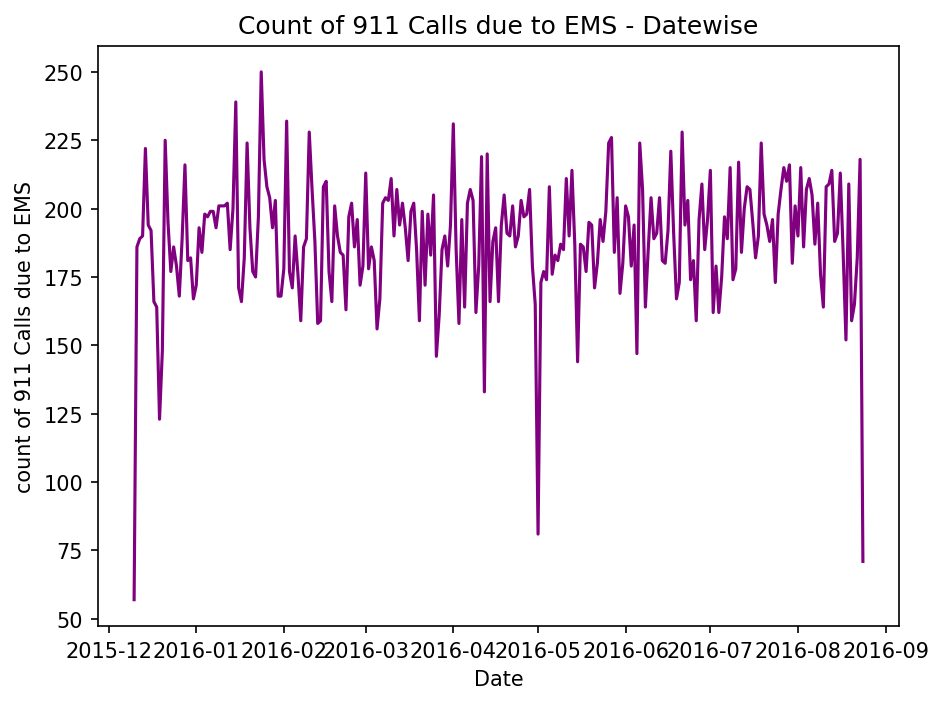

In [170]:
#plotting Count of 911 Calls due to EMS - Datewise

#On Y Axis we are using counter['twp'] which is basically giving us count of Call date wise when reason for call is EMS
sns.lineplot(x = counter['Date'], y= counter['twp'], color = 'purple')

plt.xlabel('Date')
plt.ylabel('count of 911 Calls due to EMS')
plt.title('Count of 911 Calls due to EMS - Datewise')

plt.tight_layout()
plt.show()

**Creating plot representing count of Calls - Date wise, where reason for call is Fire:**

In [172]:
#REASON: Fire -----> Date vs Call count: 

#Generating a dateframe which only contain data where reason for call is 'Traffic':
ems_reason = df[df['Reason'] == 'Fire']

#grouping above dataframe by Date & naming it as group_by_date:
group_by_date = ems_reason.groupby('Date')

#Generating dataframe containing count & naming it as Counter:
counter = group_by_date.count() 

counter.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15
2015-12-11,69,69,69,59,69,69,68,68,69,69,69,69,69
2015-12-12,68,68,68,53,68,68,68,68,68,68,68,68,68
2015-12-13,51,51,51,48,51,51,51,51,51,51,51,51,51
2015-12-14,39,39,39,36,39,39,38,39,39,39,39,39,39
2015-12-15,43,43,43,40,43,43,43,43,43,43,43,43,43
2015-12-16,53,53,53,47,53,53,53,53,53,53,53,53,53
2015-12-17,55,55,55,45,55,55,55,55,55,55,55,55,55
2015-12-18,34,34,34,32,34,34,34,34,34,34,34,34,34


In [173]:
#Resetting index of counter dataframe, so that seaborn can read the Date feature in the counter dataframe.
counter.reset_index(inplace = True)
counter.head()

,Date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15
1,2015-12-11,69,69,69,59,69,69,68,68,69,69,69,69,69
2,2015-12-12,68,68,68,53,68,68,68,68,68,68,68,68,68
3,2015-12-13,51,51,51,48,51,51,51,51,51,51,51,51,51
4,2015-12-14,39,39,39,36,39,39,38,39,39,39,39,39,39


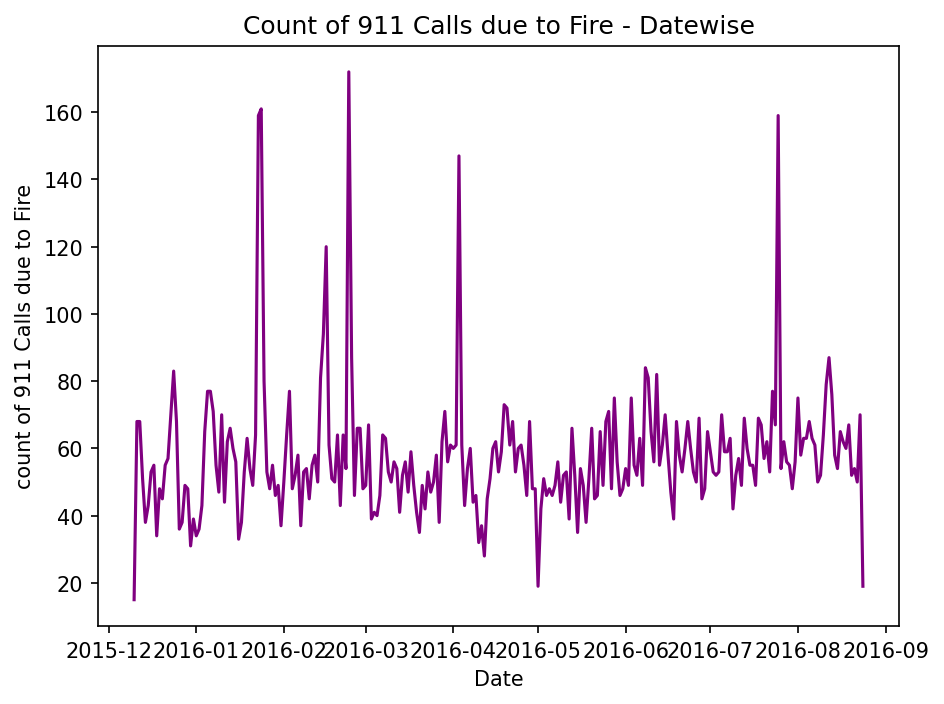

In [174]:
#plotting Count of 911 Calls due to Fire - Datewise

#On Y Axis we are using counter['twp'] which is basically giving us count of Call date wise when reason for call is Fire
sns.lineplot(x = counter['Date'], y= counter['twp'], color = 'purple')

plt.xlabel('Date')
plt.ylabel('count of 911 Calls due to Fire')
plt.title('Count of 911 Calls due to Fire - Datewise')

plt.tight_layout()
plt.show()

**Creating plot representing count of Calls - Date wise, where reason for call is Traffic:**

In [176]:
#REASON: Traffic -----> Date vs Call count: 

#Generating a dateframe which only contain data where reason for call is 'Traffic':
ems_reason = df[df['Reason'] == 'Traffic']

#grouping above dataframe by Date & naming it as group_by_date:
group_by_date = ems_reason.groupby('Date')

#Generating dataframe containing count & naming it as Counter:
counter = group_by_date.count() 

counter.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,43,43,43,35,43,43,43,41,43,43,43,43,43
2015-12-11,141,141,141,108,141,141,141,137,141,141,141,141,141
2015-12-12,146,146,146,109,146,146,146,144,146,146,146,146,146
2015-12-13,78,78,78,54,78,78,78,76,78,78,78,78,78
2015-12-14,186,186,186,150,186,186,186,184,186,186,186,186,186
2015-12-15,183,183,183,160,183,183,183,181,183,183,183,183,183
2015-12-16,132,132,132,111,132,132,132,131,132,132,132,132,132
2015-12-17,167,167,167,140,167,167,167,166,167,167,167,167,167
2015-12-18,148,148,148,123,148,148,148,148,148,148,148,148,148


In [177]:
#Resetting index of counter dataframe, so that seaborn can read the Date feature in the counter dataframe.
counter.reset_index(inplace = True)
counter.head()

,Date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,2015-12-10,43,43,43,35,43,43,43,41,43,43,43,43,43
1,2015-12-11,141,141,141,108,141,141,141,137,141,141,141,141,141
2,2015-12-12,146,146,146,109,146,146,146,144,146,146,146,146,146
3,2015-12-13,78,78,78,54,78,78,78,76,78,78,78,78,78
4,2015-12-14,186,186,186,150,186,186,186,184,186,186,186,186,186


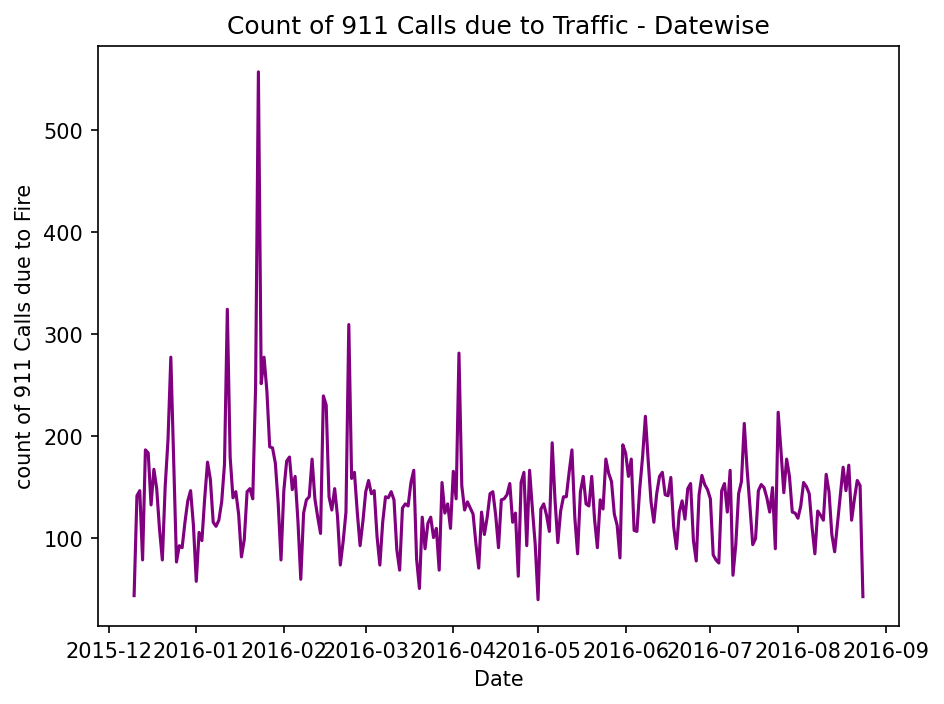

In [178]:
#plotting Count of 911 Calls due to Fire - Datewise

#On Y Axis we are using counter['twp'] which is basically giving us count of Call date wise when reason for call is Traffic
sns.lineplot(x = counter['Date'], y= counter['twp'], color = 'purple')

plt.xlabel('Date')
plt.ylabel('count of 911 Calls due to Fire')
plt.title('Count of 911 Calls due to Traffic - Datewise')

plt.tight_layout()
plt.show()

**Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [180]:
# pd.crosstab() is a frequency table generator. 
#It shows how often combinations of two (or more) categorical variables appear in your data.
# This counts how many times each combination of day and hour appears in your DataFrame, and returns a table like:

DayHour = pd.crosstab(df['Day of Week'], df['Hour'])
DayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Heatmap for above dataframe:**

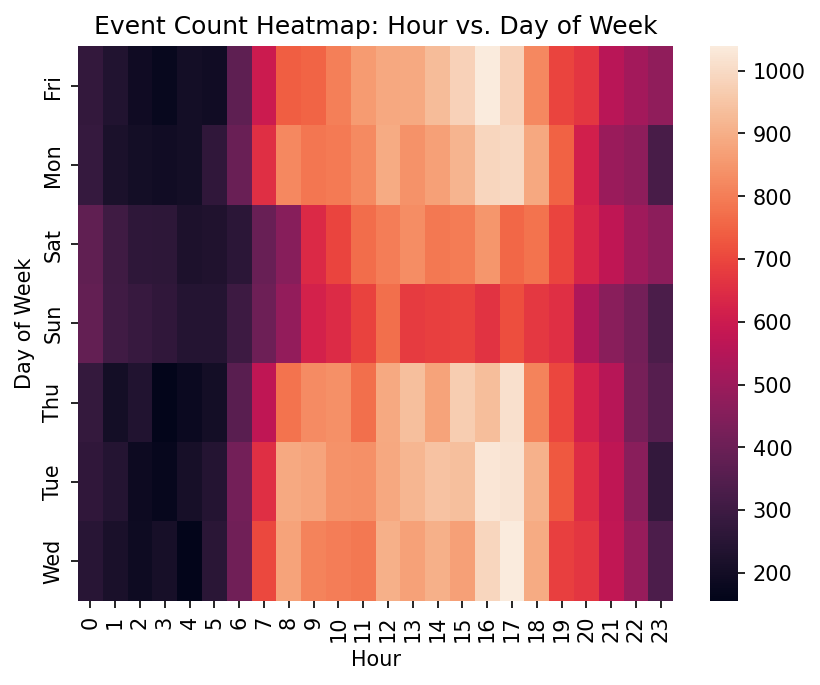

In [182]:
sns.heatmap(DayHour)
plt.title('Event Count Heatmap: Hour vs. Day of Week')
plt.show()

** Now create a clustermap using this DataFrame. **

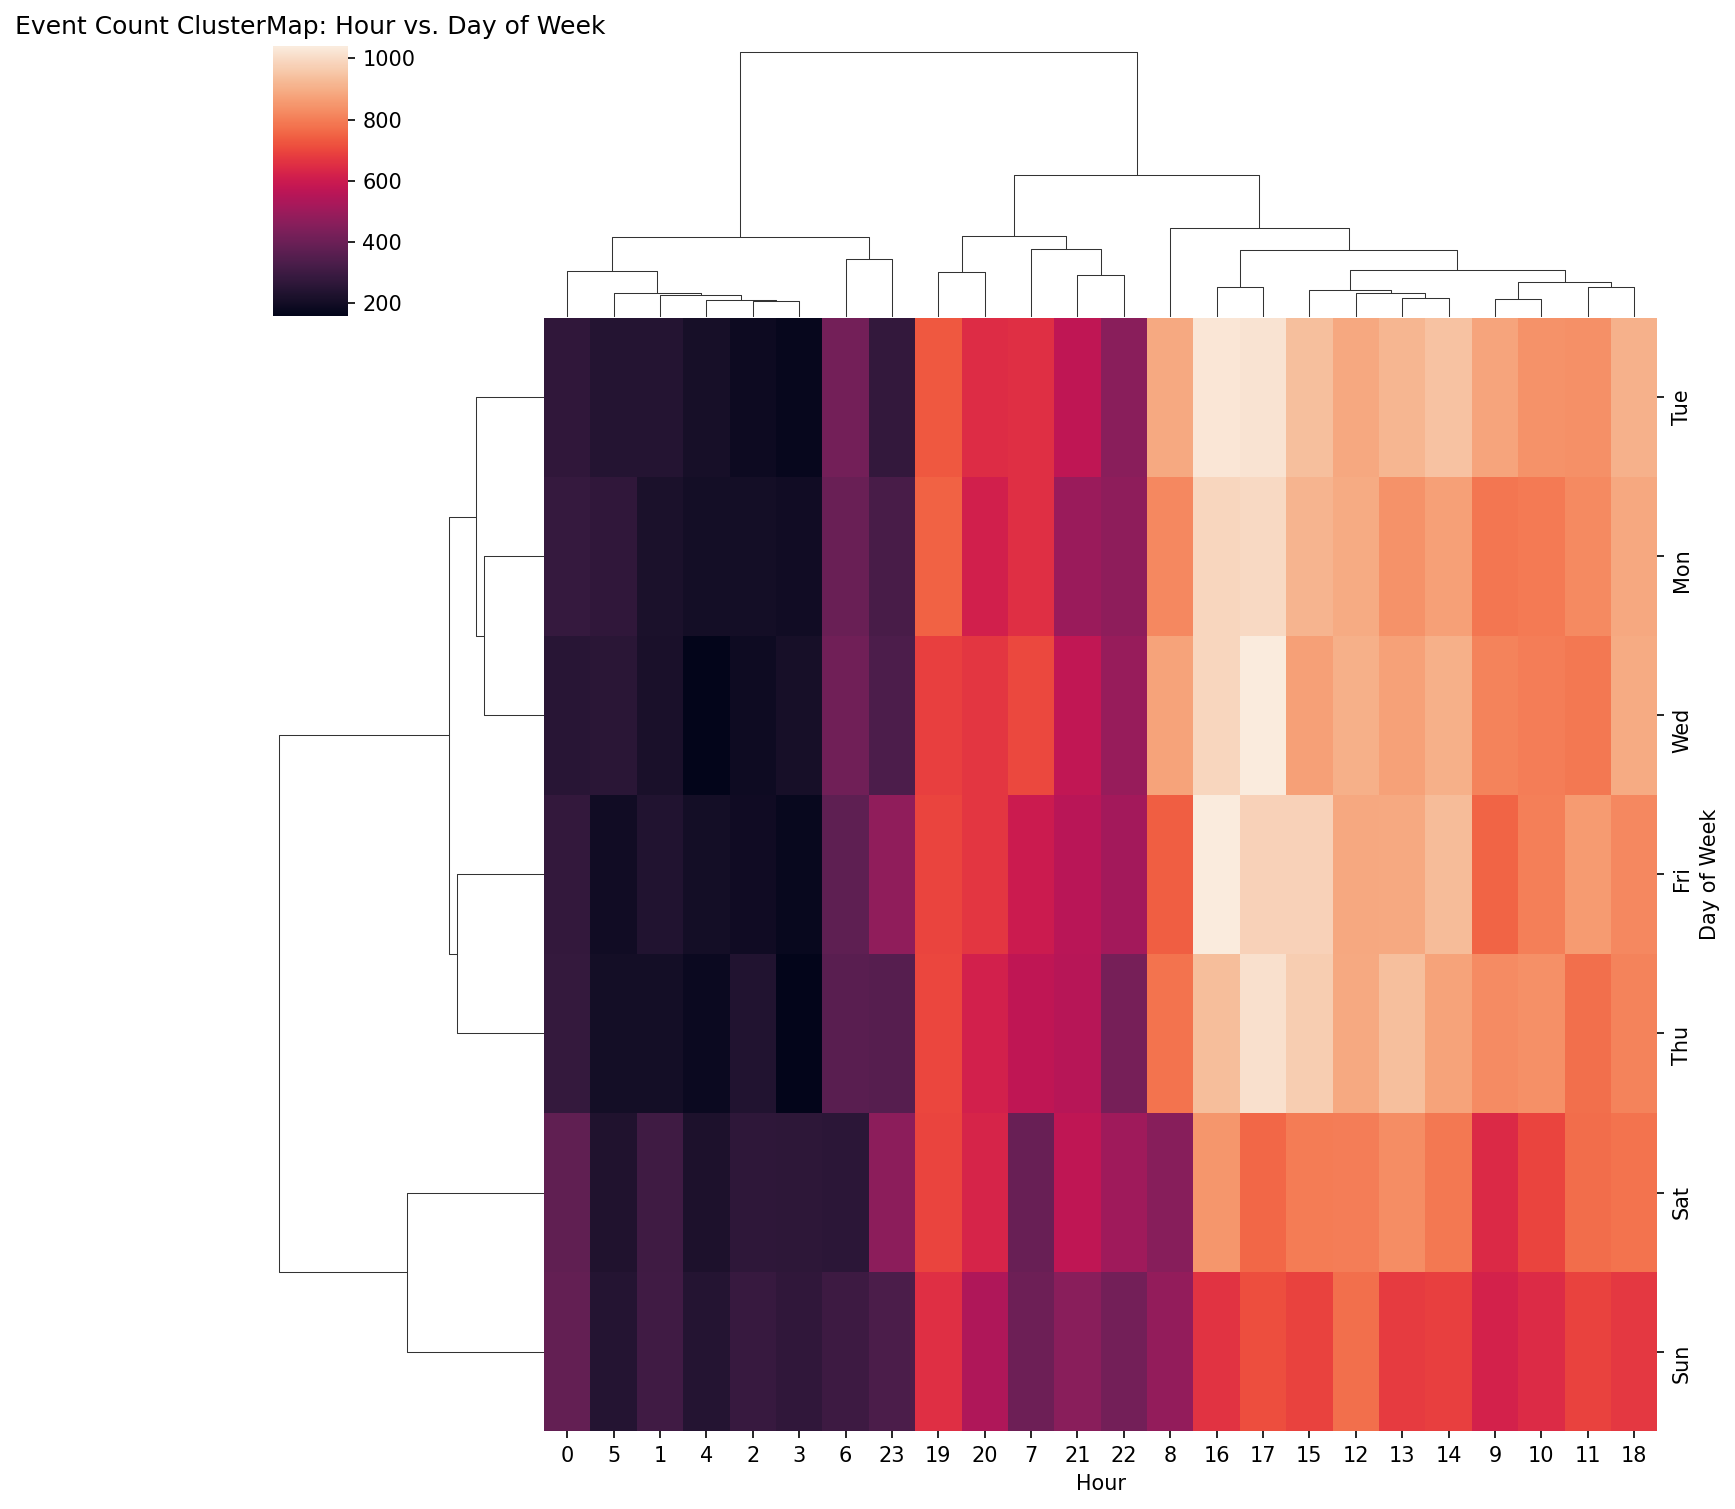

In [184]:
sns.clustermap(DayHour)
plt.title('Event Count ClusterMap: Hour vs. Day of Week')
plt.show()

**Restructuring the dataframe so that the columns become the Month and the Index becomes the Day of Week:**

In [186]:
DayMonth = pd.crosstab(df['Day of Week'], df['Month'])
DayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


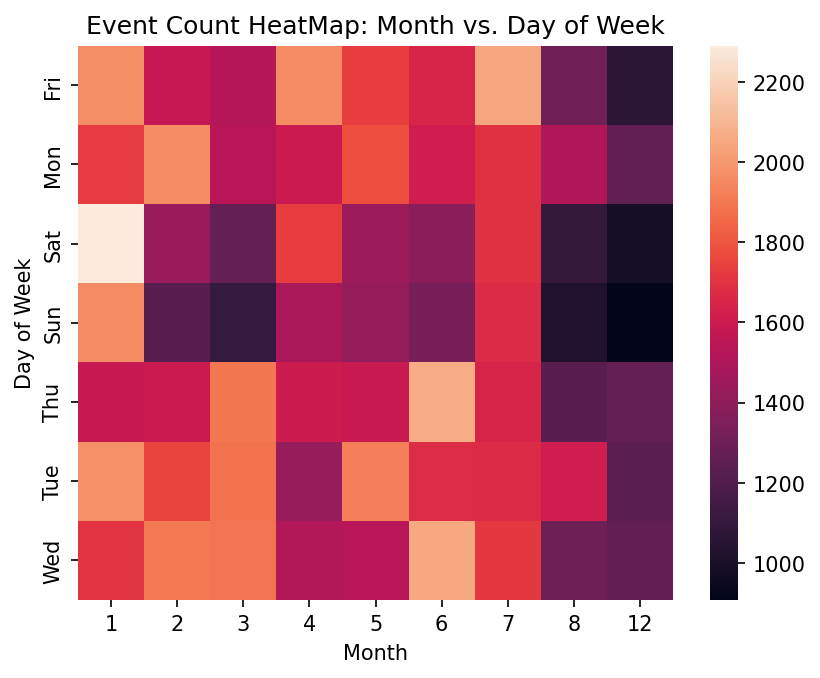

In [187]:
sns.heatmap(DayMonth)
plt.title('Event Count HeatMap: Month vs. Day of Week')

plt.show()

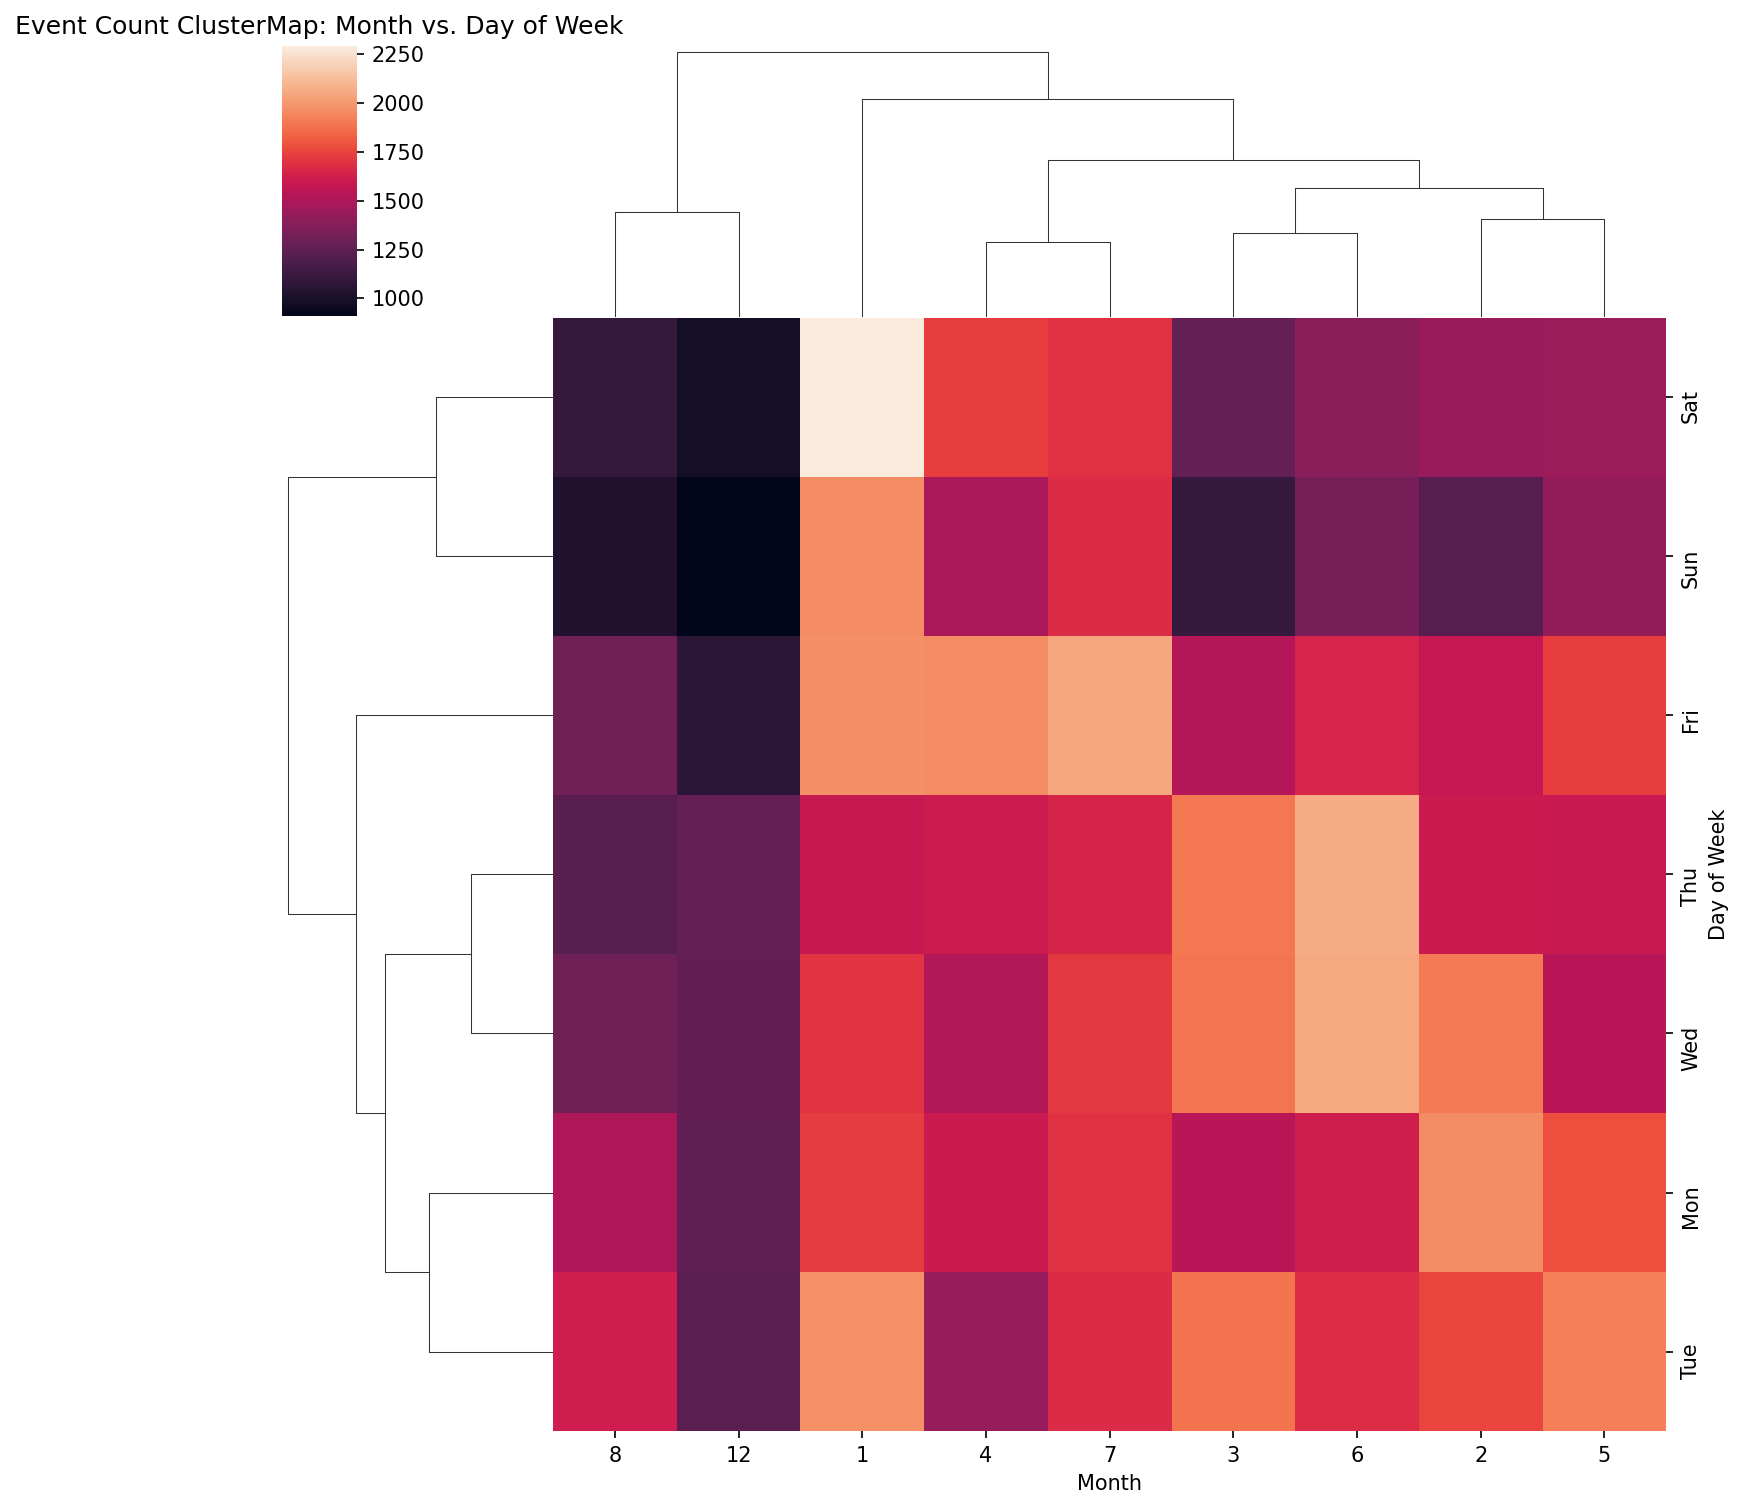

In [188]:
sns.clustermap(DayMonth)
plt.title('Event Count ClusterMap: Month vs. Day of Week')
plt.show()

----
# END